In [3]:
# Importing required libraries -

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Loading the dataset -

df=pd.read_csv("Cab_dataset.csv",parse_dates=[4,5],dayfirst=True,na_values="NA")

In [7]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT


In [10]:
# Shape of the dataset -

print("Number of Rows : ",df.shape[0])
print("Number of Columns : ",df.shape[1])

Number of Rows :  6745
Number of Columns :  6


In [11]:
# Checking the data type -

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [13]:
df.describe(include="all")

C:\Users\aayus\AppData\Local\Temp\ipykernel_24580\1985922364.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")
C:\Users\aayus\AppData\Local\Temp\ipykernel_24580\1985922364.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
count,6745.000000,6745,4095.000000,6745,6745,2831
unique,NaN,2,NaN,3,5618,2598
top,NaN,City,NaN,Trip Completed,2016-07-11 19:02:00,2016-07-11 13:00:00
freq,NaN,3507,NaN,2831,6,4
first,NaN,NaN,NaN,NaN,2016-07-11 00:00:00,2016-07-11 00:51:00
last,NaN,NaN,NaN,NaN,2016-07-15 23:59:58,2016-07-16 01:09:24
mean,3384.644922,NaN,149.501343,NaN,NaN,NaN
std,1955.099667,NaN,86.051994,NaN,NaN,NaN
min,1.000000,NaN,1.000000,NaN,NaN,NaN
25%,1691.000000,NaN,75.000000,NaN,NaN,NaN


In [16]:
# Checking the Null values--

df.isna().sum()/ len(df) * 100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [17]:
# Checking for duplicate rows -

print("No. of duplicate rows: ", df.duplicated().sum())

No. of duplicate rows:  0


In [18]:
# Adding Hour Column in Dataset based on Request timestamp

df["Requested_Hour"]=df["Request timestamp"].dt.hour

In [19]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Requested_Hour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8
...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23


In [20]:
# Separate 5 different timeslots from the Hour - Dawn, Early Morning, Noon, Late Evening, Night -

bin=[0,4,9,16,21,24]
label=["Dawn","Early Morning","Noon","Late Evening","Night"]

df["TimeSlot"]=pd.cut(df["Requested_Hour"],bins=bin,labels=label)

In [21]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Requested_Hour,TimeSlot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Noon
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Late Evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Early Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,Late Evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Early Morning
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,Night
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,Night
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,Night
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,Night


In [22]:
# Calling first 10 sample from dataset

df.sample(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Requested_Hour,TimeSlot
3461,4527,City,149.0,Cancelled,2016-07-14 09:27:26,NaT,9,Early Morning
2627,6372,Airport,276.0,Trip Completed,2016-07-15 19:09:35,2016-07-15 19:37:24,19,Late Evening
1025,161,Airport,107.0,Trip Completed,2016-07-11 05:36:00,2016-07-11 06:10:00,5,Early Morning
2790,1333,City,296.0,Trip Completed,2016-07-11 23:17:00,2016-07-12 00:15:00,23,Night
5649,4115,City,NaN,No Cars Available,2016-07-14 04:11:42,NaT,4,Dawn
3961,3156,City,270.0,Cancelled,2016-07-13 09:00:40,NaT,9,Early Morning
4506,1168,Airport,NaN,No Cars Available,2016-07-11 20:48:00,NaT,20,Late Evening
4687,1711,City,NaN,No Cars Available,2016-07-12 08:12:00,NaT,8,Early Morning
3007,454,City,47.0,Cancelled,2016-07-11 09:10:00,NaT,9,Early Morning
1682,651,Airport,178.0,Trip Completed,2016-07-11 12:45:00,2016-07-11 13:25:00,12,Noon


In [23]:
# Distinguish the Supply-Demand Gap by a new variable Cab Availability where Supply is when Trip is Completed, all else is Demand -

df["Cab Availability"]=df["Status"].apply(lambda x: "Availabilty" if x=="Trip Completed" else "Non Availability")

In [24]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Requested_Hour,TimeSlot,Cab Availability
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Noon,Availabilty
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Late Evening,Availabilty
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Early Morning,Availabilty
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,Late Evening,Availabilty
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Early Morning,Availabilty
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,Night,Non Availability
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,Night,Non Availability
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,Night,Non Availability
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,Night,Non Availability


In [25]:
df["Cab Availability"].value_counts(normalize=True)*100

Non Availability    58.028169
Availabilty         41.971831
Name: Cab Availability, dtype: float64

### Note
From "Non Availability" count i.e. 58.02879 we can observe that it is equal to Drop Timestamp Total Null values Sum

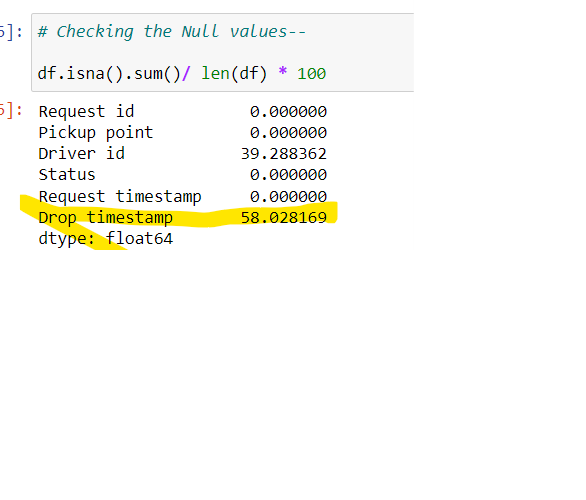

Text(0.5, 1.0, 'Frequency of Requests by Hour')

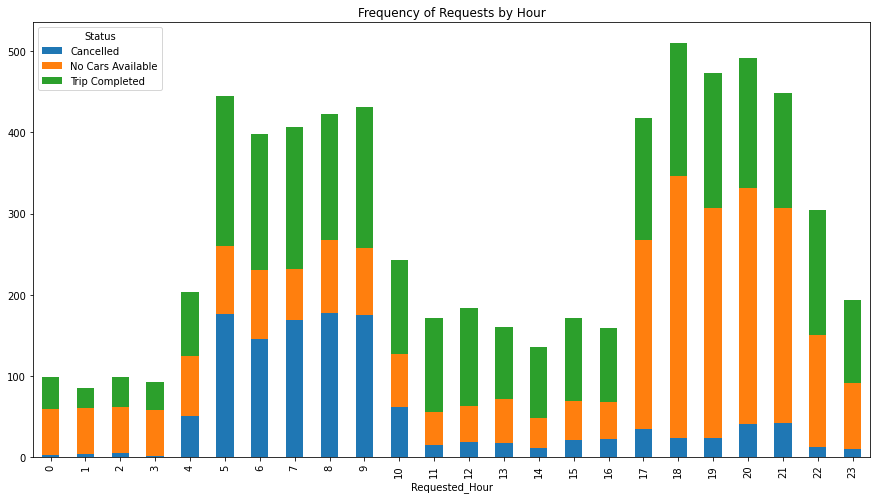

In [37]:
# Frequency of Requests by Hour -

df.groupby(['Requested_Hour','Status']).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Frequency of Requests by Hour')

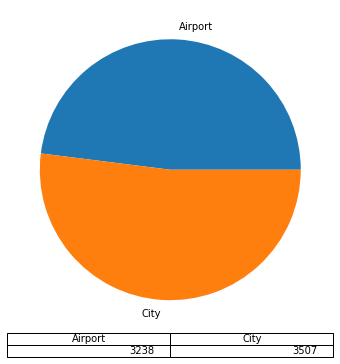

In [50]:
# Types of Requests (city-airport or airport-city) 

df.groupby(['Pickup point']).size().plot(kind="pie",stacked=True,figsize=(6,6),table=True)
plt.ylabel("")
plt.show()

<AxesSubplot: >

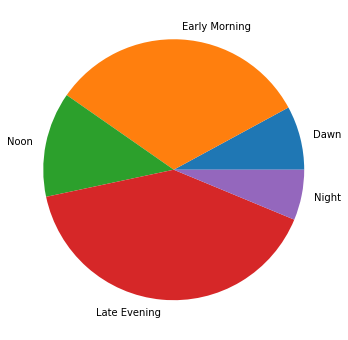

In [56]:
# Distribution of Time Slots -

df[df["Cab Availability"]=="Non Availability"].groupby(["TimeSlot"]).size().plot(kind="pie",stacked=True,figsize=(6,6))

Text(0.5, 1.0, 'Airport to City')

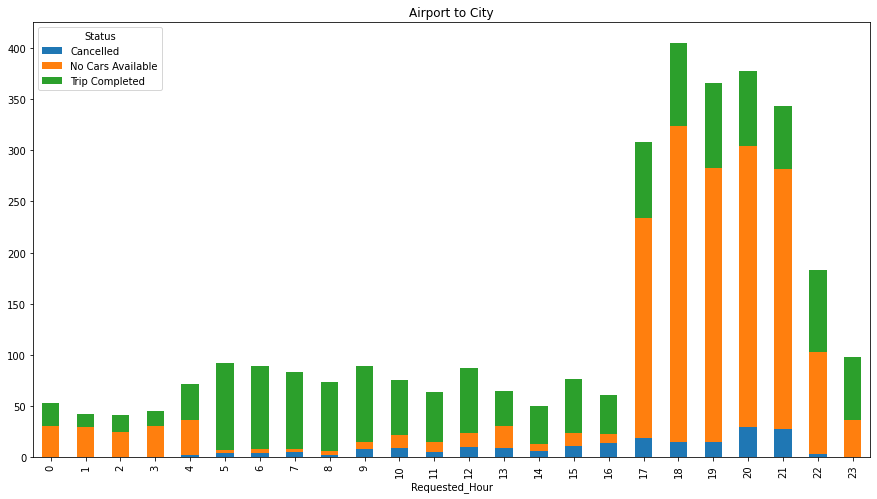

In [67]:
# Demand-Supply Gap from Airport to City -

df[df["Pickup point"]=="Airport"].groupby(["Requested_Hour","Status"]).size().unstack().plot(kind="bar",stacked=True,figsize=(15,8))
plt.title("Airport to City")

Text(0.5, 1.0, 'City to Airport')

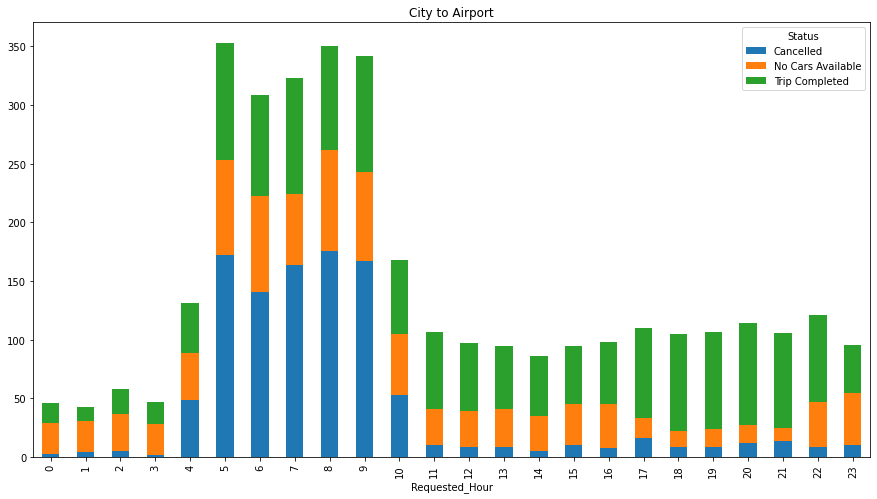

In [70]:
# Demand-Supply Gap from City to Airport -

df[(df['Pickup point']=="City")].groupby(['Requested_Hour','Status']).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('City to Airport')

Text(0.5, 1.0, 'Time slots where highest gap exists')

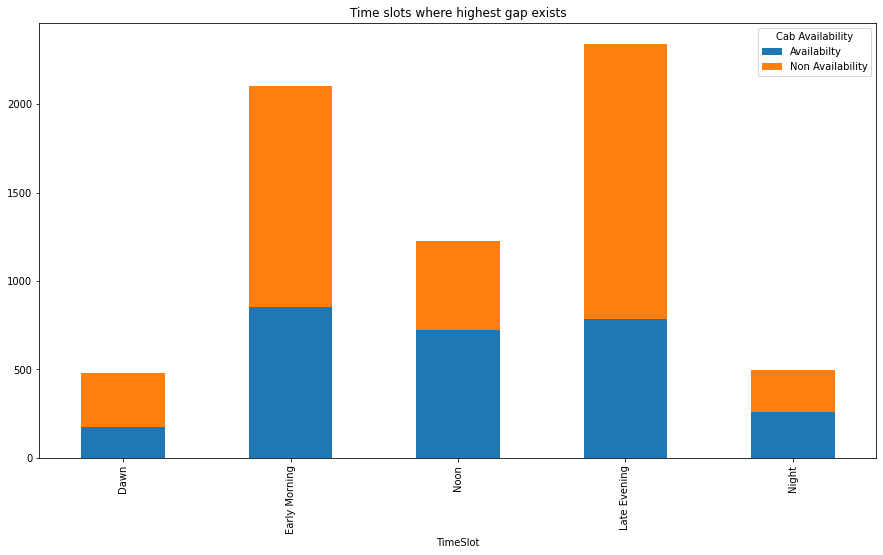

In [71]:
# Time slots where highest gap exists -

df.groupby(['TimeSlot','Cab Availability']).size().unstack().plot(kind='bar', stacked=True,figsize=(15, 8))
plt.title('Time slots where highest gap exists')